In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [3]:
# Display full text in dataframe.
#
# Отображать текст в датафрейме полностью.  
# pd.set_option('display.max_colwidth', None)

In [4]:
# Display all columns in dataframe.
#
# Отображать все колонки.  
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("processed_data.csv")

In [6]:
df.head(5)

,name,role,employer.name,area.name,salary_from,salary_to,snippet.requirement,snippet.responsibility,experience.name,accept_temporary,published_at,url,employment.name,id,salary.gross,key_skills,schedule,description,common_role,profession,country,language,language_level,1c,3nf,590-п,a/b test,abc-анализ,ad hoc analysis,adobe photoshop,agile,amazon,amqp,analysis,analyst,analytics,ansible,apache airflow,apache atlas,apache hadoop,apache kafka,apache nifi,apache spark,apache стек,api,apple search ads,appmetrica,appsflyer,arenadata db,asp.net,attribution,audioediting,auto-encoders,avro,aws,azure,b2b,b2b marketing,b2c,backend,bash,bcbs,bert,bi tool,bi visiology,bi системы,big data,bigquery,bitrix24,bpmn,business analysis,business intelligence,c#,c++,c/c++,caffe,calypso,cassandra,catboost,causal inference,cdc,chat gpt,chef,ci/cd,ci\\cd,clickhouse,cloud,column-oriented,computer vision,confluence,cost of risk,cpc,crm,css,cuda,cx исследования,cython,dagster,dask,data,data analysis,data engineering,data governance,data lake,data mining,data mining statistica,data modeling,data quality,data science,data vault,data vault 2.0,database management,databases,databricks,datadriven,datalake,datalens,dataquality,datavault,dax,dbt,debezium,deductor,deep learning,deep reinforcement learning,deep structured learning,dei,devops,digital marketing,django,django framework,dml,docker,dremio,ds,dsp,dvc,dwh,dwh\\data lake,ead,ecomm,elastic,elasticsearch,elk,elmo,elt,engineering,english,english b1,english b2,er-модель,erp,etl,excel,face analyze,face detection,facebook,facebook api,fast api,fastapi,feature store,finagle,fintech,flask,flink,fluent english,future store,gamedev,gan,general dl,generative ai,gensim,git,github,gitlab,glove,gnn,go,golang,google adwords,google analytics,google api,google cloud platform,google docs,google sheets,google tag manager,gpt,grafana,graph embedding,graph-oriented,graphql,greenplum,groovy,gtm,hadoop,hdfs,helm,hive,html,html5,http,hypersonic sql,image recognition,impala,inference optimization,informatica,informatica axon data governance,internet,irb,iron python,it,java,java se,java/scala,javascript,jenkins,jira,js,json,json api,jupyter notebook,jython,k-means,k8s,kafka,kanban,keras,kerastase,kibana,knowledge graph embedding (kge),knowledge management,ksqldb,kuberflow,kubernetes,layoutlm,lgd,libreoffice,linux,llm,loginom,looker,ltv,luigi,luxms bi,machine learning,map-reduce,maple,mapreduce,mariadb,mathematical analysis,mathematical modeling,mathematical statistics,mathematics,matlab,matplotlib,mdm,mdx,microservices,microsoft access,miner,minio,mipt+huawei,ml flow,ml system design,ml/ds,mlflow,mlops,mongodb,mpp,mpstats,ms access,ms crm,ms excel,ms excel (vba power query) python,ms power bi,ms powerbi,ms powerpoint,ms project,ms sql,ms sql server,multi-armed bandits,multi-relation learning,mysql,neo4j,ner,network security,neural nets,ni-fi,nifi,nlp,nosql,numpy,object detection,ocr,odi,ods,olap,olap (online analytical processing),opencv,openoffice,openshift,oracle,oracle bi,oracle crm,oracle db,oracle pl/sql,oracle python (jupyter notebook pandas statsmodels scikit learn scipy),os linux/unix,pandas,pbi,pca,pd,pd lgd ead,pd/lgd,pl/sql,plotly,pmbok,postgresql,postman,power apps,power bi,power pivot,power query,powerbi,powerbi qlicksense,powerbi qlikview qliksense,presto,product development,project management,pycharm,pypy,pyspark,pytest,python,python pycharm jupyterhub,pyton,pytorch,qlik,qlik sense,qliksense,qlikview,qt,r,r rstudio,r studio,r&d проекты в области ai/ml,rabbitmq,random forest,rdbms,recommender systems,recsys,redash,redis,redshift,reinforcement learning,remote config,reporting,requests,rest,rest api,rnd,rstudio,rust,s3,sap,sap business objects,sap process integration,sas,sas di,scala,scikit,scikit-learn,scipy,scl,scrum,seaborn,search engine,search ranking,semantic segmentation libraries,senior data scientist,shell scripting,sklearn,snowflake,sns,soap,soft skills,spark,spark streaming,speech,speech2text,spring boot,spring

# Profession

#### Number of offers for all professions in percent

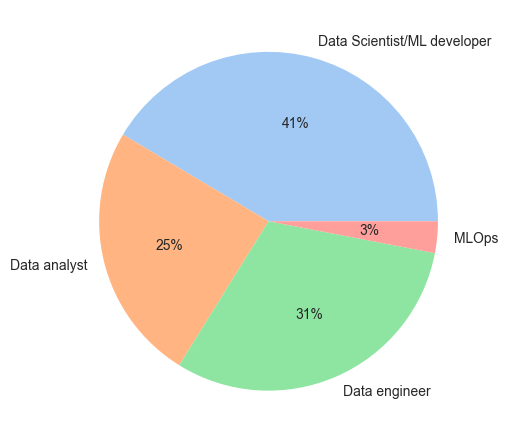

In [34]:
df_pie = df.groupby('profession').aggregate({'profession': 'count'})

plt.pie(df_pie.profession,
        labels=df_pie.index,
        colors=sns.color_palette('pastel')[0:5],
        autopct='%.0f%%'
       )
histplot4.set_title('MLOps', fontsize=16);

plt.show()

Most of all in the market of offers for specialties Data Scientist / ML engineer

Больше всего на рынке предложений для специальносте Data Scientist/ML engineer

#### Distribution of average salaries by profession

For convenience, let's add one more column 'salary' - the average between the maximum and minimum in the salary fork

Добавим для удобства еще один столбец, связанный с зарплатой - salary - среднее между максимумом и минимумом в зарплатной вилке

In [8]:
df['salary'] = (df.salary_from +df.salary_to)/2

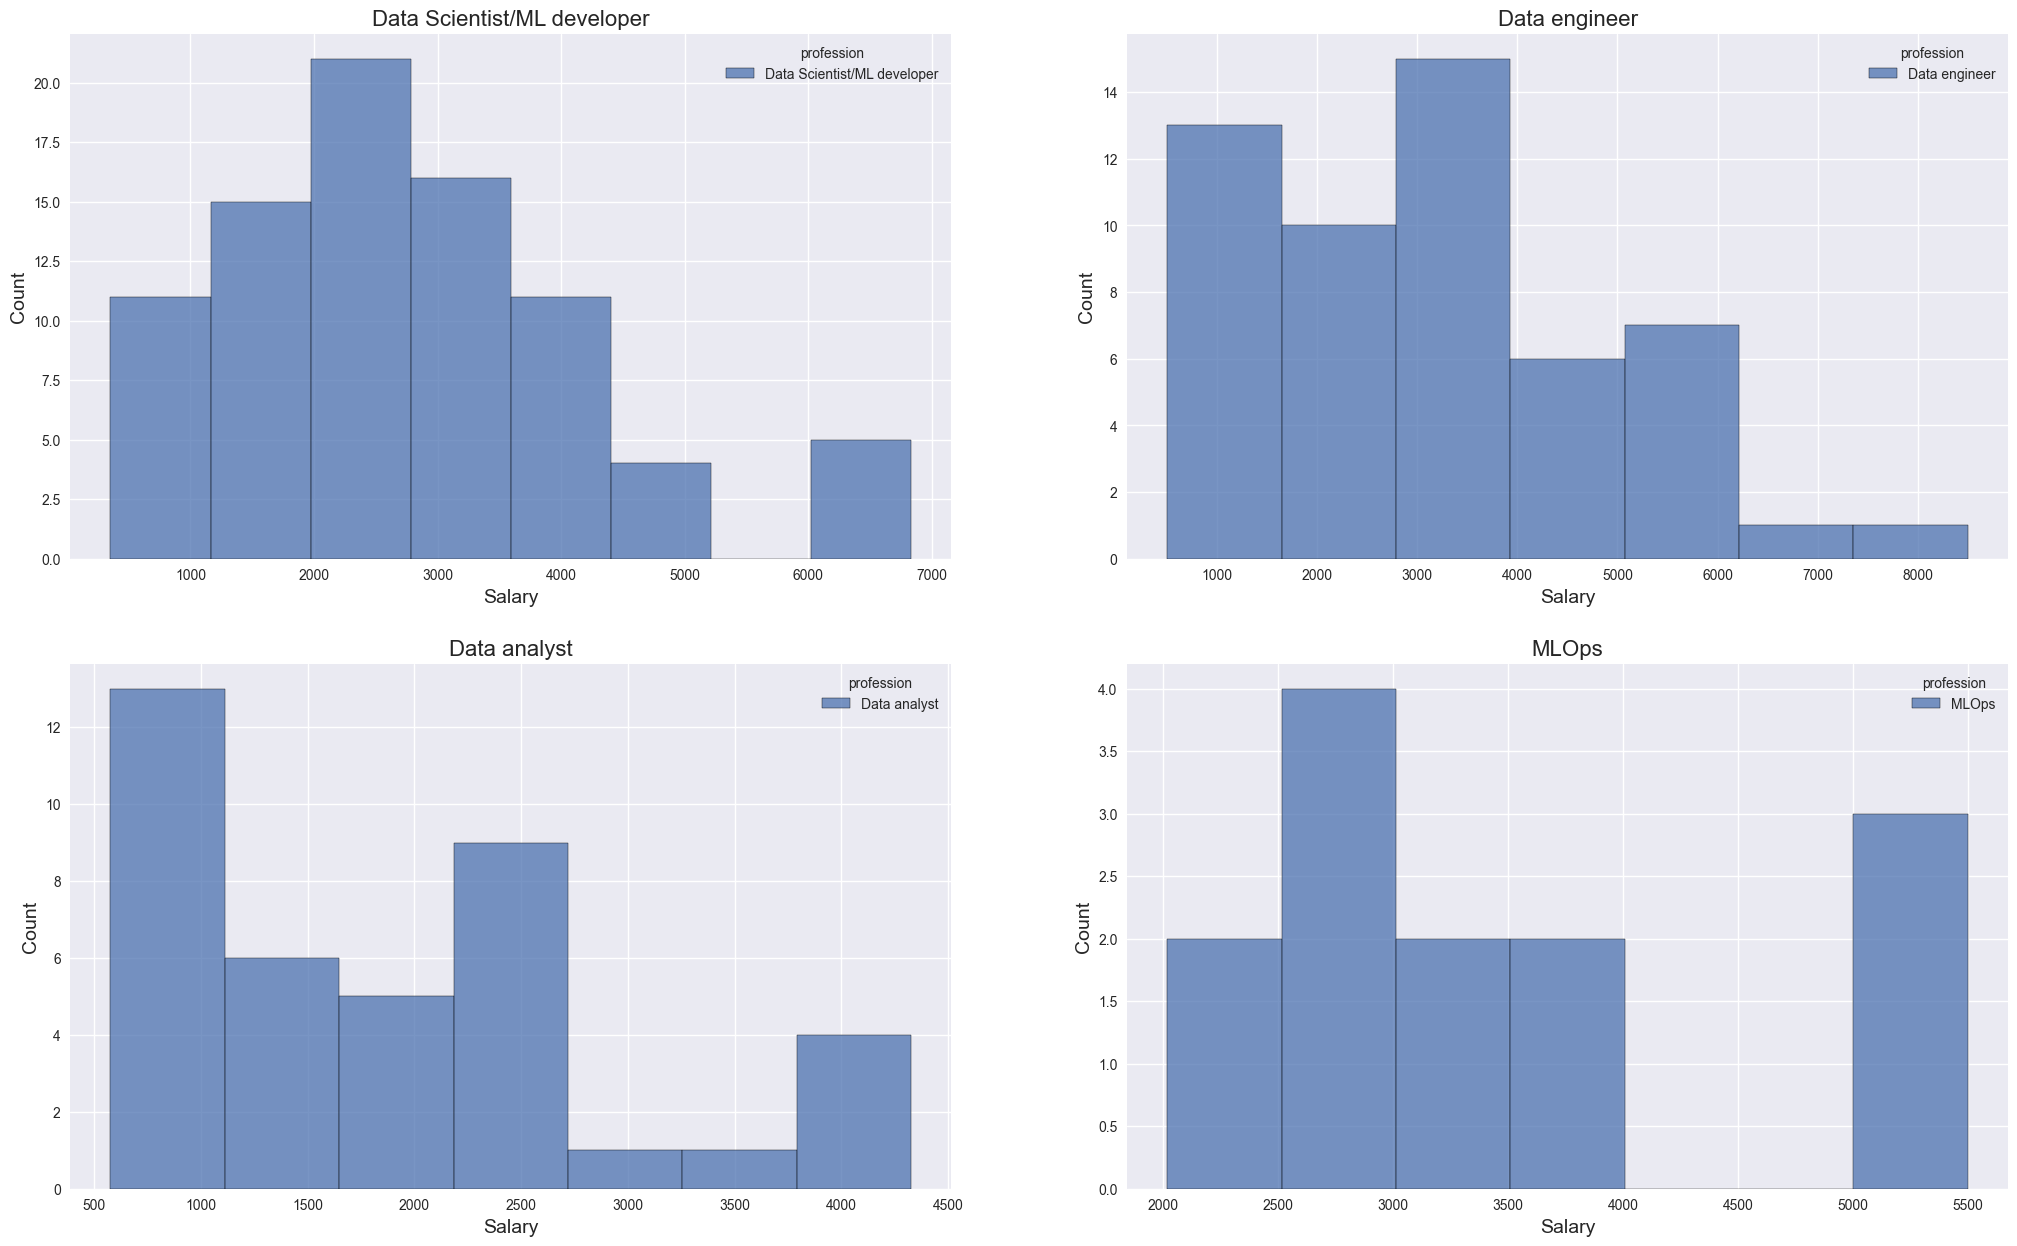

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))

histplot1 = sns.histplot(data=df[df.profession == 'Data Scientist/ML developer'],
                         x="salary",   
                         hue="profession", 
                         multiple="dodge",
                         ax=axes[0][0])

histplot1.set_title('Data Scientist/ML developer', fontsize=16);
histplot1.set_xlabel('Salary', fontsize=14);
histplot1.set_ylabel('Count', fontsize=14);

histplot2 = sns.histplot(data=df[df.profession == 'Data engineer'],
                         x="salary",
                         hue="profession",
                         multiple="dodge",
                         ax=axes[0][1],
                         shrink=1)

histplot2.set_title('Data engineer', fontsize=16);
histplot2.set_xlabel('Salary', fontsize=14);
histplot2.set_ylabel('Count', fontsize=14);

histplot3 = sns.histplot(data=df[df.profession == 'Data analyst'],
                         x="salary",
                         hue="profession",
                         multiple="dodge",
                         ax=axes[1][0],
                         shrink=1)

histplot3.set_title('Data analyst', fontsize=16);
histplot3.set_xlabel('Salary', fontsize=14);
histplot3.set_ylabel('Count', fontsize=14);

histplot4 = sns.histplot(data=df[df.profession == 'MLOps'],
                         x="salary",
                         hue="profession",
                         multiple="dodge",
                         ax=axes[1][1],
                         shrink=1)

histplot4.set_title('MLOps', fontsize=16);
histplot4.set_xlabel('Salary', fontsize=14);
histplot4.set_ylabel('Count', fontsize=14);


Distribution of average salaries by professions on a single bar graph

Распределение усредненных зарплат в выборке по профессиям на одном графике

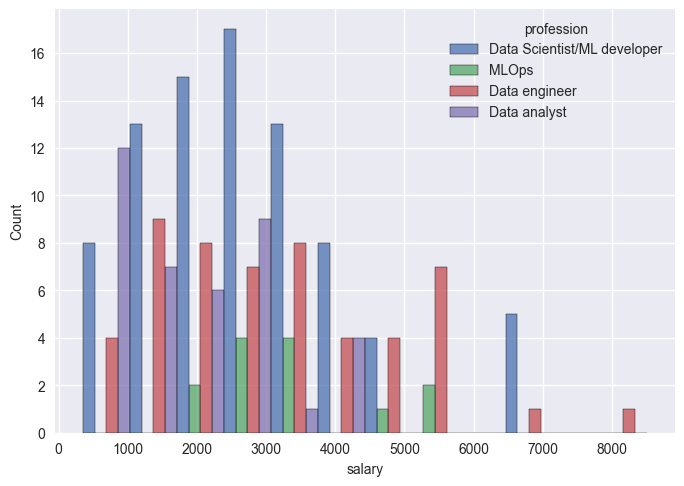

In [10]:
sns.histplot(data=df,
             x="salary",
             hue="profession",
             multiple="dodge", shrink=1
            )

plt.show()

# Experience

Let's see how experience affects average salary.

Посмотрим, как опыт влияет на размер усредненной зарплаты

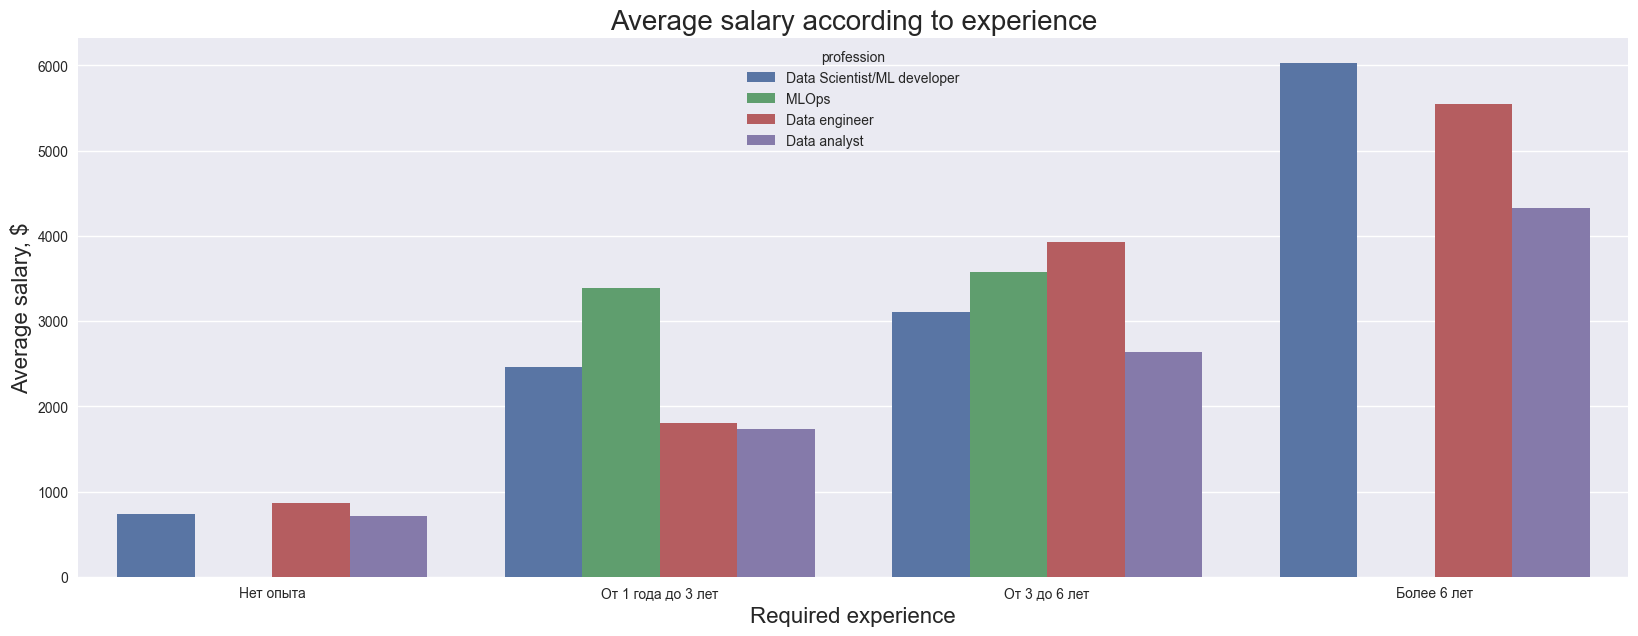

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))

barplot1 = sns.barplot(
           data=df,
           x='experience.name',
           y='salary',
           hue='profession',
           ci=None
           )

barplot1.tick_params(axis='x', rotation=0);
barplot1.set_title('Average salary according to experience', fontsize=20);
barplot1.set_xlabel('Required experience', fontsize=16);
barplot1.set_ylabel('Average salary, $', fontsize=16);

It is also interesting to look at the maximum salary in the context of experience.

Интересно так же посмотреть на максимальную зарплату в разрезе опыта

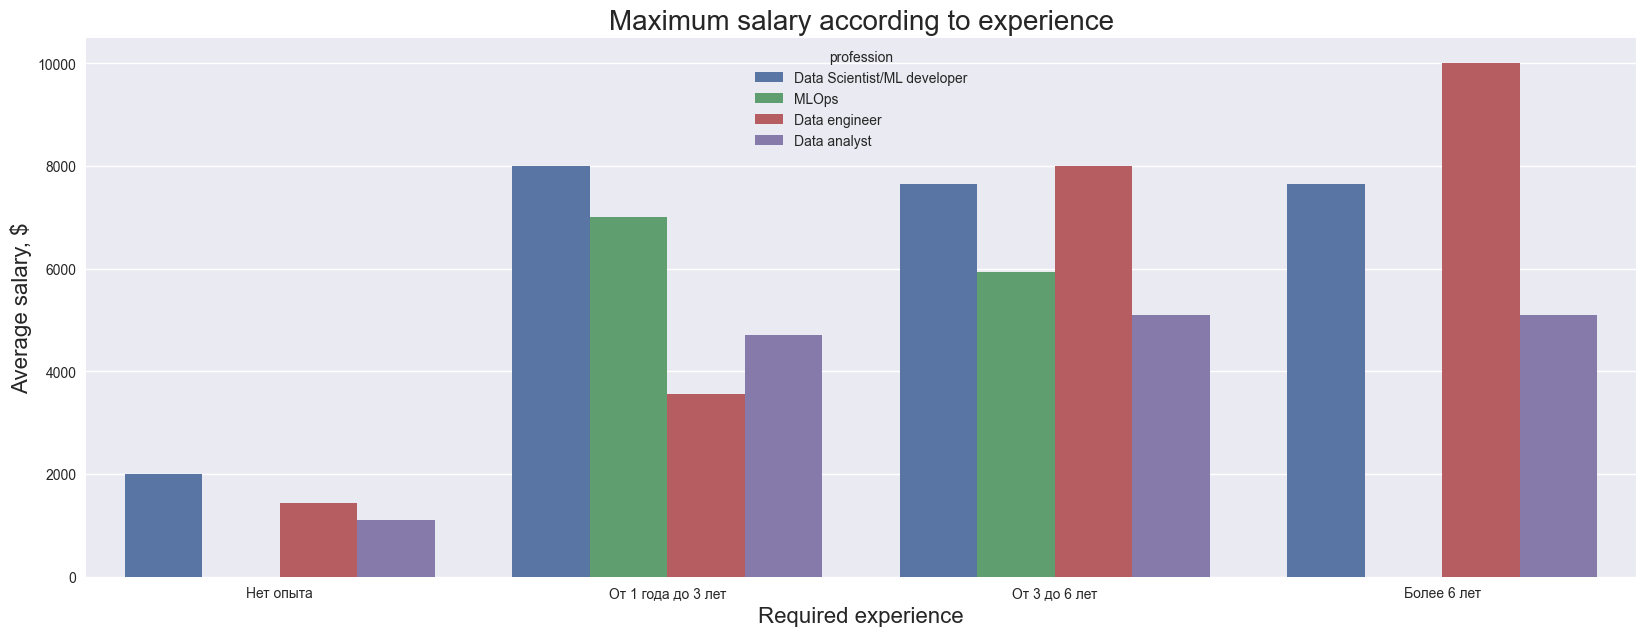

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))

barplot1 = sns.barplot(
           data=df,
           x='experience.name',
           y='salary_to',
           hue='profession',
           estimator='max',
           ci=None
           )

barplot1.tick_params(axis='x', rotation=0);
barplot1.set_title(
          'Maximum salary according to experience',
          fontsize=20);
barplot1.set_xlabel('Required experience', fontsize=16);
barplot1.set_ylabel('Average salary, $', fontsize=16);


# Country

#### The ratio of the number of ads from different countries

#### Соотношение количества объявлений с разных стран

In [13]:
df_pie_country = df.groupby('country').aggregate({'country': 'count'}) \
                 .rename(columns = {'country': 'country_count'}) \
                 .sort_values(by='country_count', ascending=False)

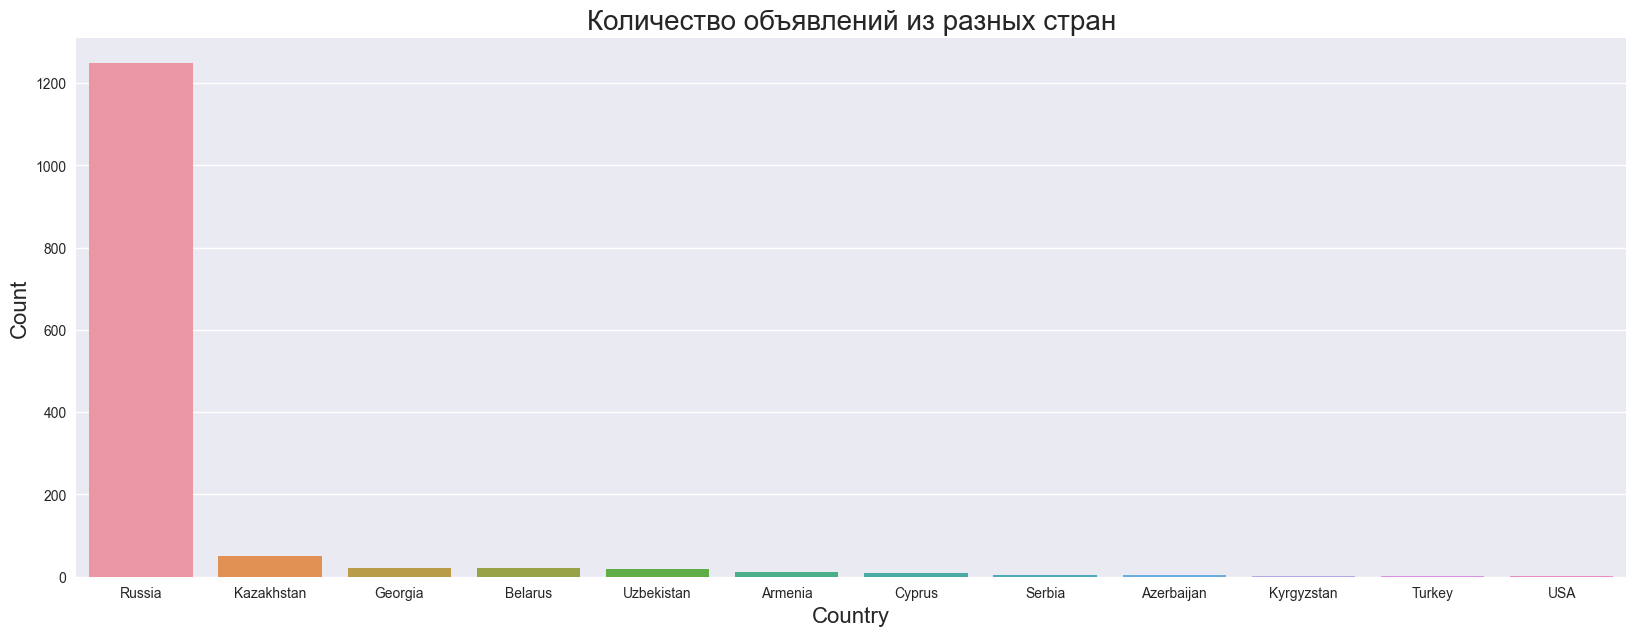

In [14]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))

barplot_country = sns.barplot(
           data=df_pie_country,
           x=df_pie_country.index,
           y='country_count', 
           
           ci=None
           )

barplot_country.tick_params(axis='x', rotation=0);
barplot_country.set_title(
           'Количество объявлений из разных стран',
           fontsize=20
           );
barplot_country.set_xlabel('Country', fontsize=16);
barplot_country.set_ylabel('Count', fontsize=16);

In [15]:
df_pie_country

,country_count
country,
Russia,1248
Kazakhstan,51
Georgia,21
Belarus,20
Uzbekistan,19
Armenia,11
Cyprus,9
Serbia,5
Azerbaijan,3


#### Dependence of salary level on the country

#### Зависимость уровня зарплаты от страны

Although there are few observations for countries other than the Russian Federation, it is still interesting to see how salaries compare.

Хотя наблюдений по странам, отличным от РФ мало, все равно интересно посмотреть, как соотносятся зарплаты.

In [16]:
df.country[df.salary.isnull() == False].value_counts()

Russia        168
Kazakhstan     12
Georgia         4
Cyprus          1
USA             1
Turkey          1
Armenia         1
Name: country, dtype: int64

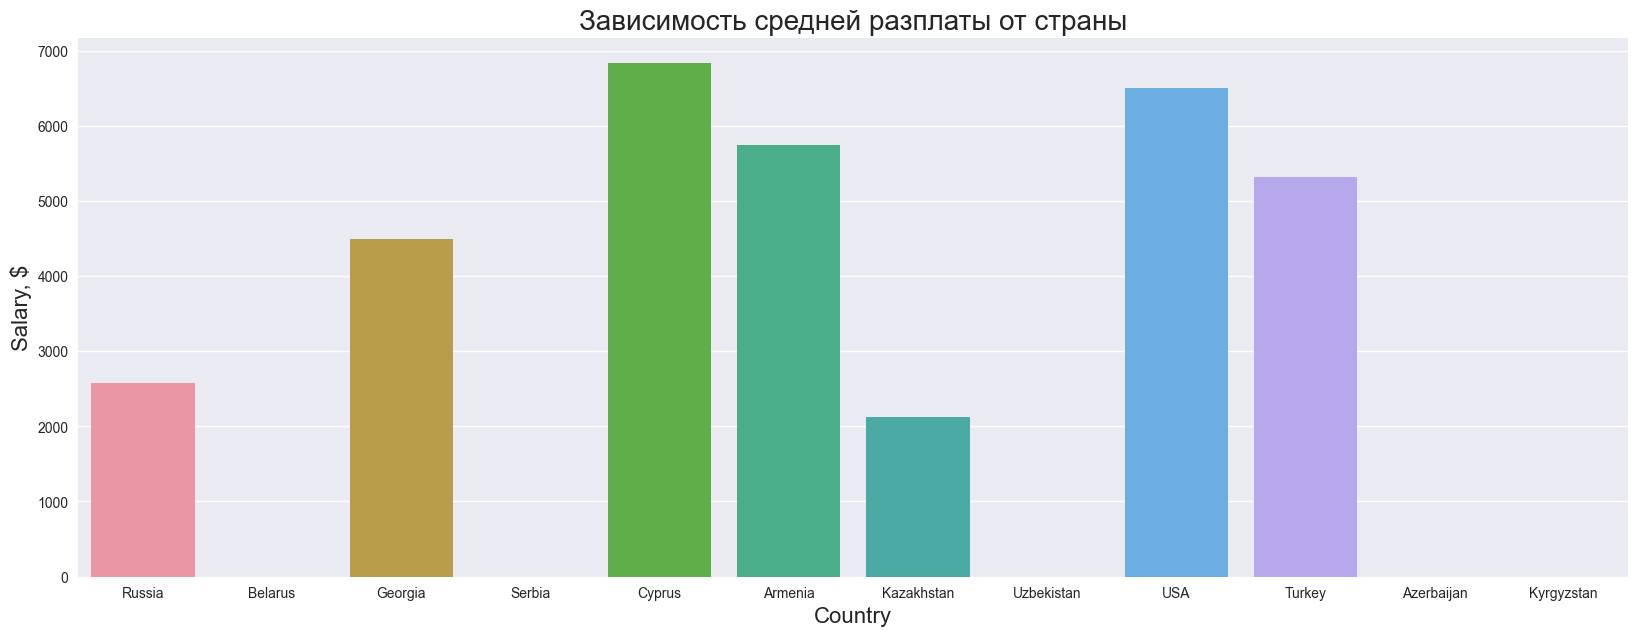

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))

barplot_country_salary = sns.barplot(
           data=df,
           x='country',
           y='salary',
           estimator='median',
           ci=None
           )

barplot_country_salary.tick_params(axis='x', rotation=0);
barplot_country_salary.set_title(
           'Зависимость средней разплаты от страны',
           fontsize=20
           );
barplot_country_salary.set_xlabel('Country', fontsize=16);
barplot_country_salary.set_ylabel('Salary, $', fontsize=16);

По диаграмме видно, что в РФ зарплаты в среднем больше чем в Казахстане, но меньше чем в Грузии, Турции, Армении и на Кипре.

# Language

Посмотрим, как часто и какой уровень английского требуется.

In [18]:
df.groupby(['language','language_level']).aggregate({'language_level': 'count'})

language_level
language language_level                
eng      a1                           8
         a2                           2
         b1                          30
         b2                          43
         c1                          17
rus      c1                           1
         c2                           2

Русский язык рассматривать не будем, так как анализируем русскоязычный сайт.

In [19]:
# уберем записи о русском яззыке
df.loc[(df.language == 'rus'), ('language', 'language_level')] = np.nan

Посмотрим, как влияет уровень английского на уровень зарплаты.

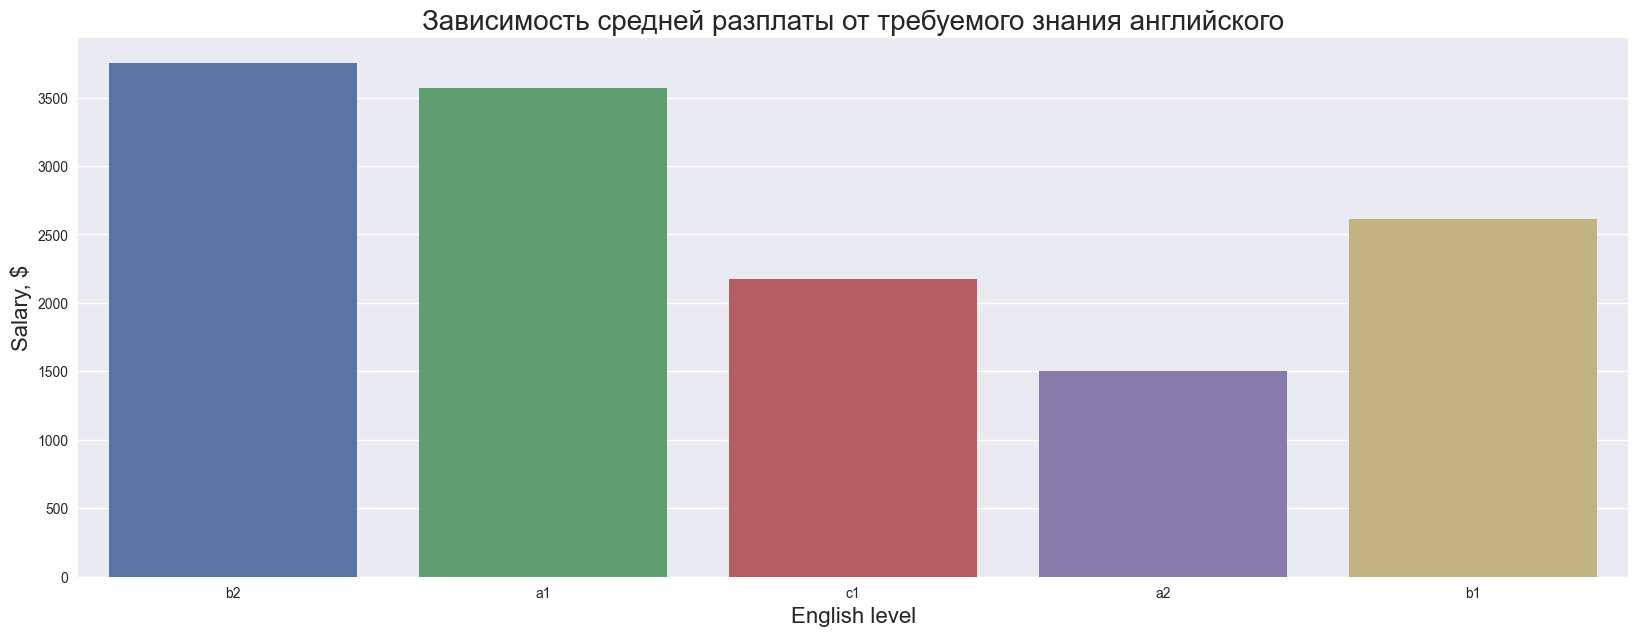

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))

barplot_language_salary = sns.barplot(
           data=df,
           x='language_level',
           y='salary',
           estimator='median',
           ci=None
           )

barplot_language_salary.tick_params(
           axis='x',
           rotation=0
           );

barplot_language_salary.set_title(
           'Зависимость средней разплаты от требуемого знания английского',
           fontsize=20
           );
barplot_language_salary.set_xlabel(
           'English level',
           fontsize=16
           );
barplot_language_salary.set_ylabel(
           'Salary, $',
           fontsize=16
           );

По данному графику зависимость не прослеживается. Возможно потому что основная масса объявлений все же предполагает работу на территории РФ. Так же возможно что у нас просто слишком мало наблюдений.

In [21]:
df_language_level = df[(df.language == 'eng')&
                       (df.salary.isnull() == False)]

In [22]:
df_language_level.language_level.value_counts()

b2    10
c1     4
a1     3
b1     3
a2     1
Name: language_level, dtype: int64

# Schedule

In [23]:
df.schedule.value_counts()

fullDay        985
remote         342
flexible        61
flyInFlyOut      1
Name: schedule, dtype: int64

Из всех значений в этом столбце больше всего интересны вакансии с пометкой remote

Интересно посмотреть, есть ли зависимость между зарплатами в вакансиях на удаленной работе и в офисе

In [24]:
df_remote = df[['schedule','salary']]
df_remote.loc[df_remote.schedule != 'remote', 'schedule'] = 'office'

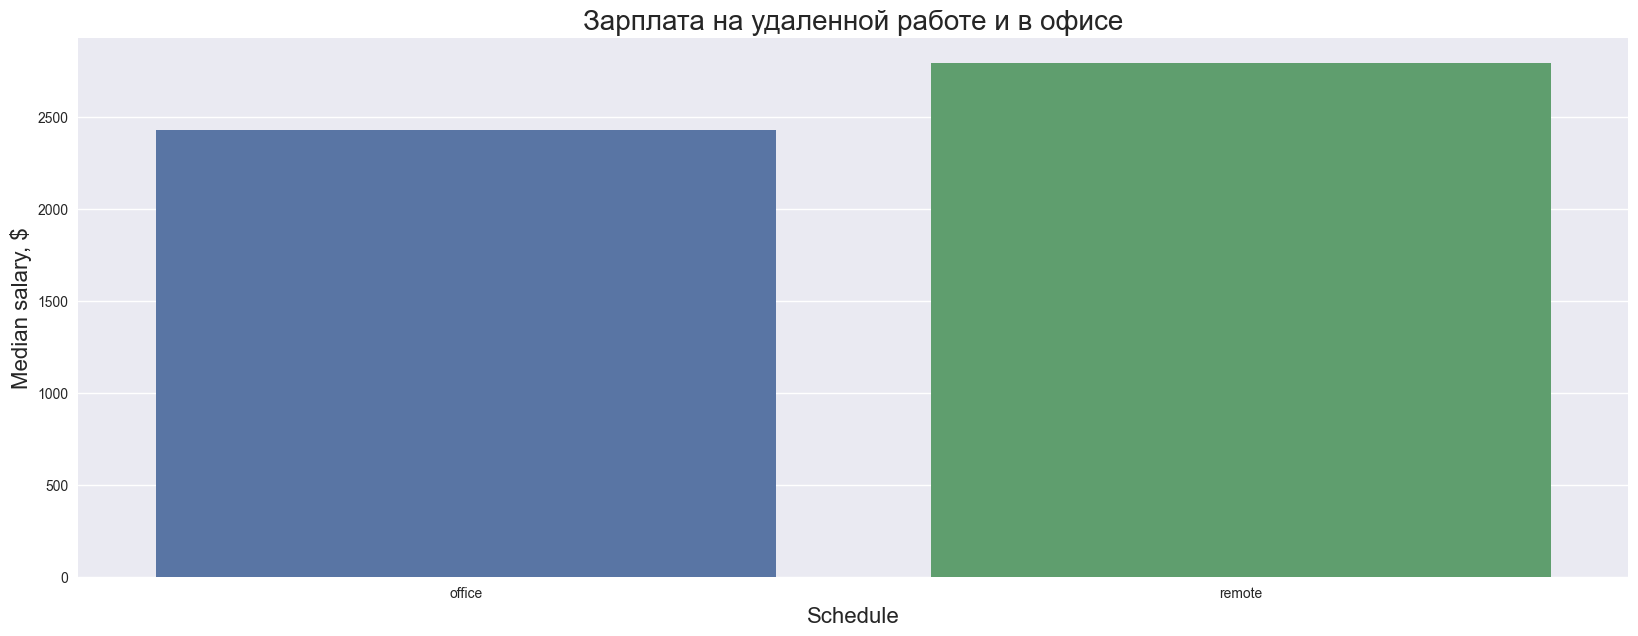

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))

barplot_remote_salary = sns.barplot(
           data=df_remote,
           x='schedule',
           y='salary',
           estimator='median',
           ci=None
           )

barplot_remote_salary.tick_params(
           axis='x',
           rotation=0
           );

barplot_remote_salary.set_title(
           'Зарплата на удаленной работе и в офисе',
           fontsize=20
           );
barplot_remote_salary.set_xlabel(
           'Schedule',
           fontsize=16
           );
barplot_remote_salary.set_ylabel(
           'Median salary, $',
           fontsize=16
           );

# Key skills

Посмотрим, какие навыки чаще всего требуются для разных специальностей

In [26]:
def bar_top_skills(profession):
    """
    This function creates a dataframe in which the indexes
    are skills, and in the column the number of mentions in
    all ads in the "key skills" section. After that, the
    function creates a barplot for this dataframe.  

    Parameters:
        profession: profession for which skills are shown
        
    Returns:
        barplot
    """
    df_skills = df[df.profession == profession].drop([
                     'name',
                     'role',
                     'employer.name',
                     'area.name',
                     'salary_from',
                     'salary_to',
                     'snippet.requirement',
                     'snippet.responsibility',
                     'experience.name',
                     'accept_temporary',
                     'published_at',
                     'url',
                     'employment.name',
                     'id',
                     'salary.gross',
                     'key_skills',
                     'schedule',
                     'description',
                     'common_role',
                     'country',
                     'language',
                     'language_level',
                     'salary'                                              
                     ], axis=1)
    
    df_skills_2 = df_skills.drop(['profession'], axis=1)
    df_skills_2 = df_skills_2.sum()
    df_skills_2 = df_skills_2.sort_values(ascending=False).head(30)
    df_skills_2 = df_skills_2.to_frame(name='sum')
    
    
    ig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))

    barplot_de_skills = sns.barplot(
           data=df_skills_2,
           x='sum',
           y=df_skills_2.index,
           ci=None
           )

    barplot_de_skills.tick_params(
           axis='y',
           rotation=0,
           labelsize=15
           );
    barplot_de_skills.tick_params(
           axis='x',
           rotation=0,
           labelsize=15
           );

    barplot_de_skills.set_title(
           f'Топ требований для специализации {profession}',
           fontsize=30
           );
    barplot_de_skills.set_xlabel(
           'Встречаемость в объявлениях',
           fontsize=20
           );

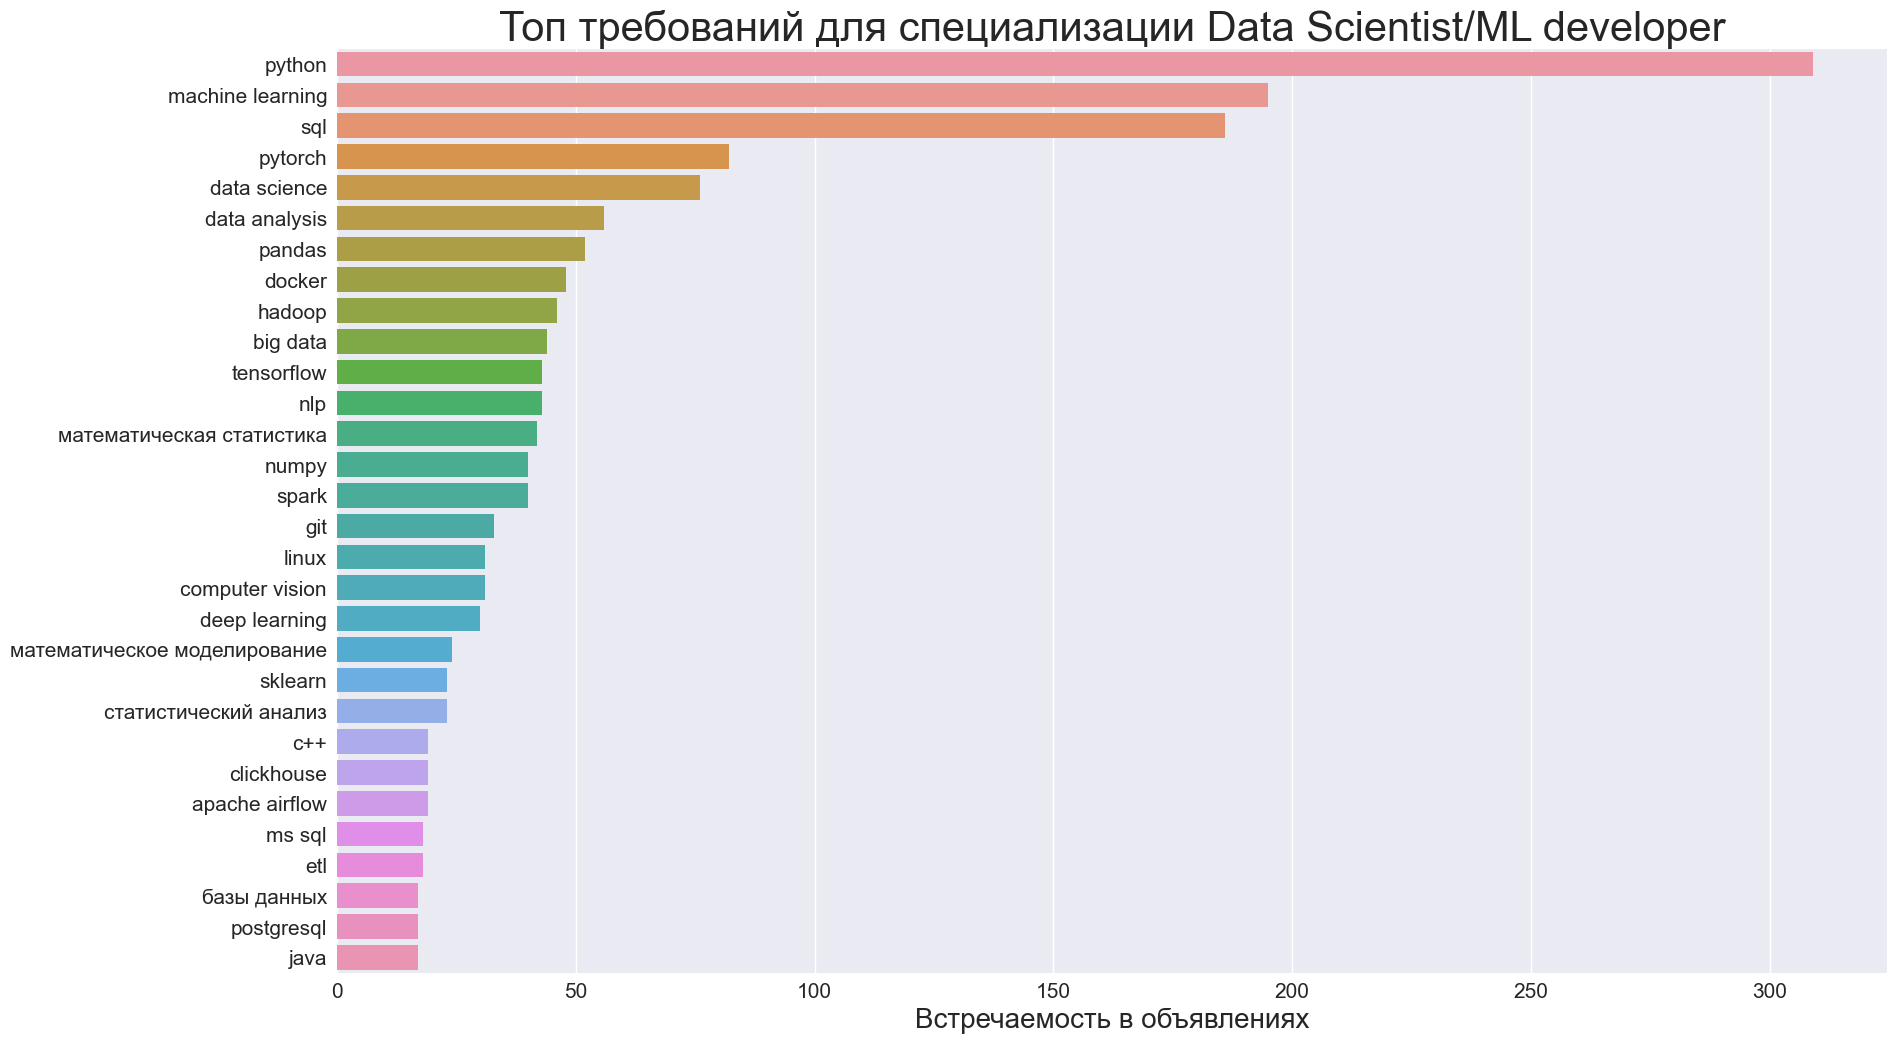

In [27]:
bar_top_skills('Data Scientist/ML developer')

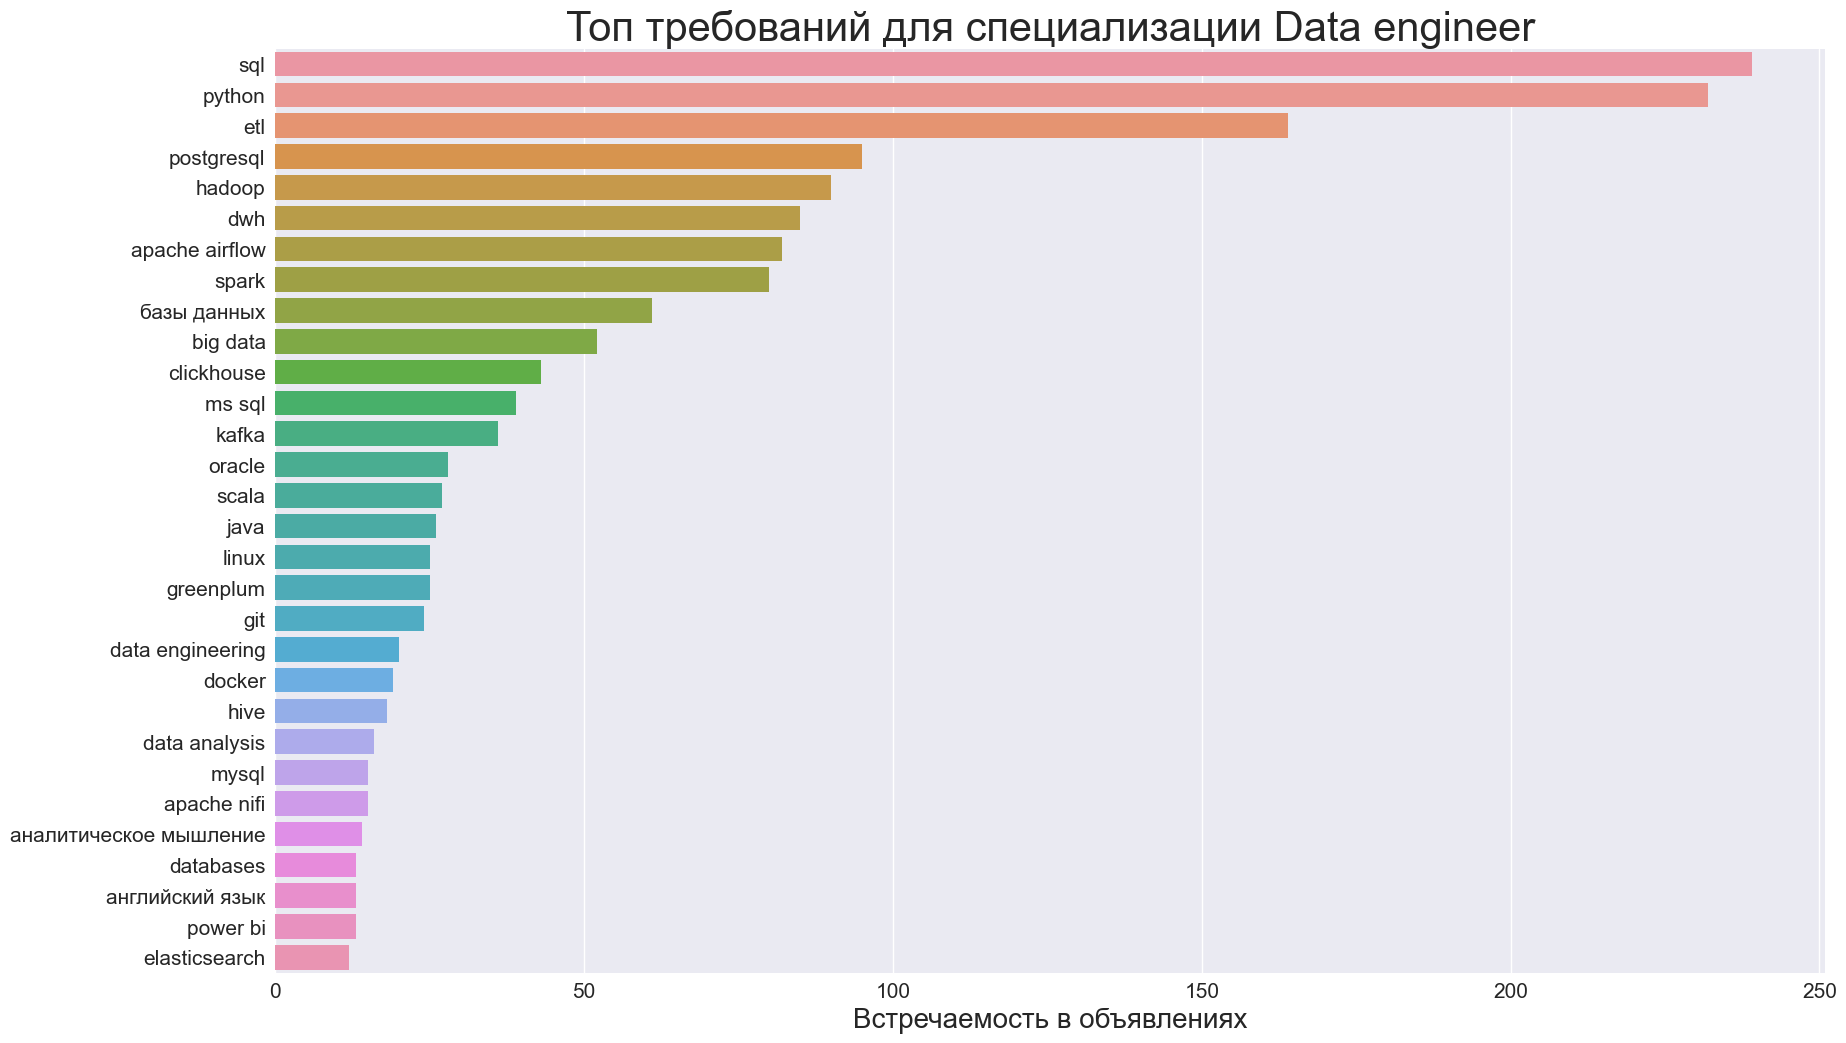

In [28]:
bar_top_skills('Data engineer')

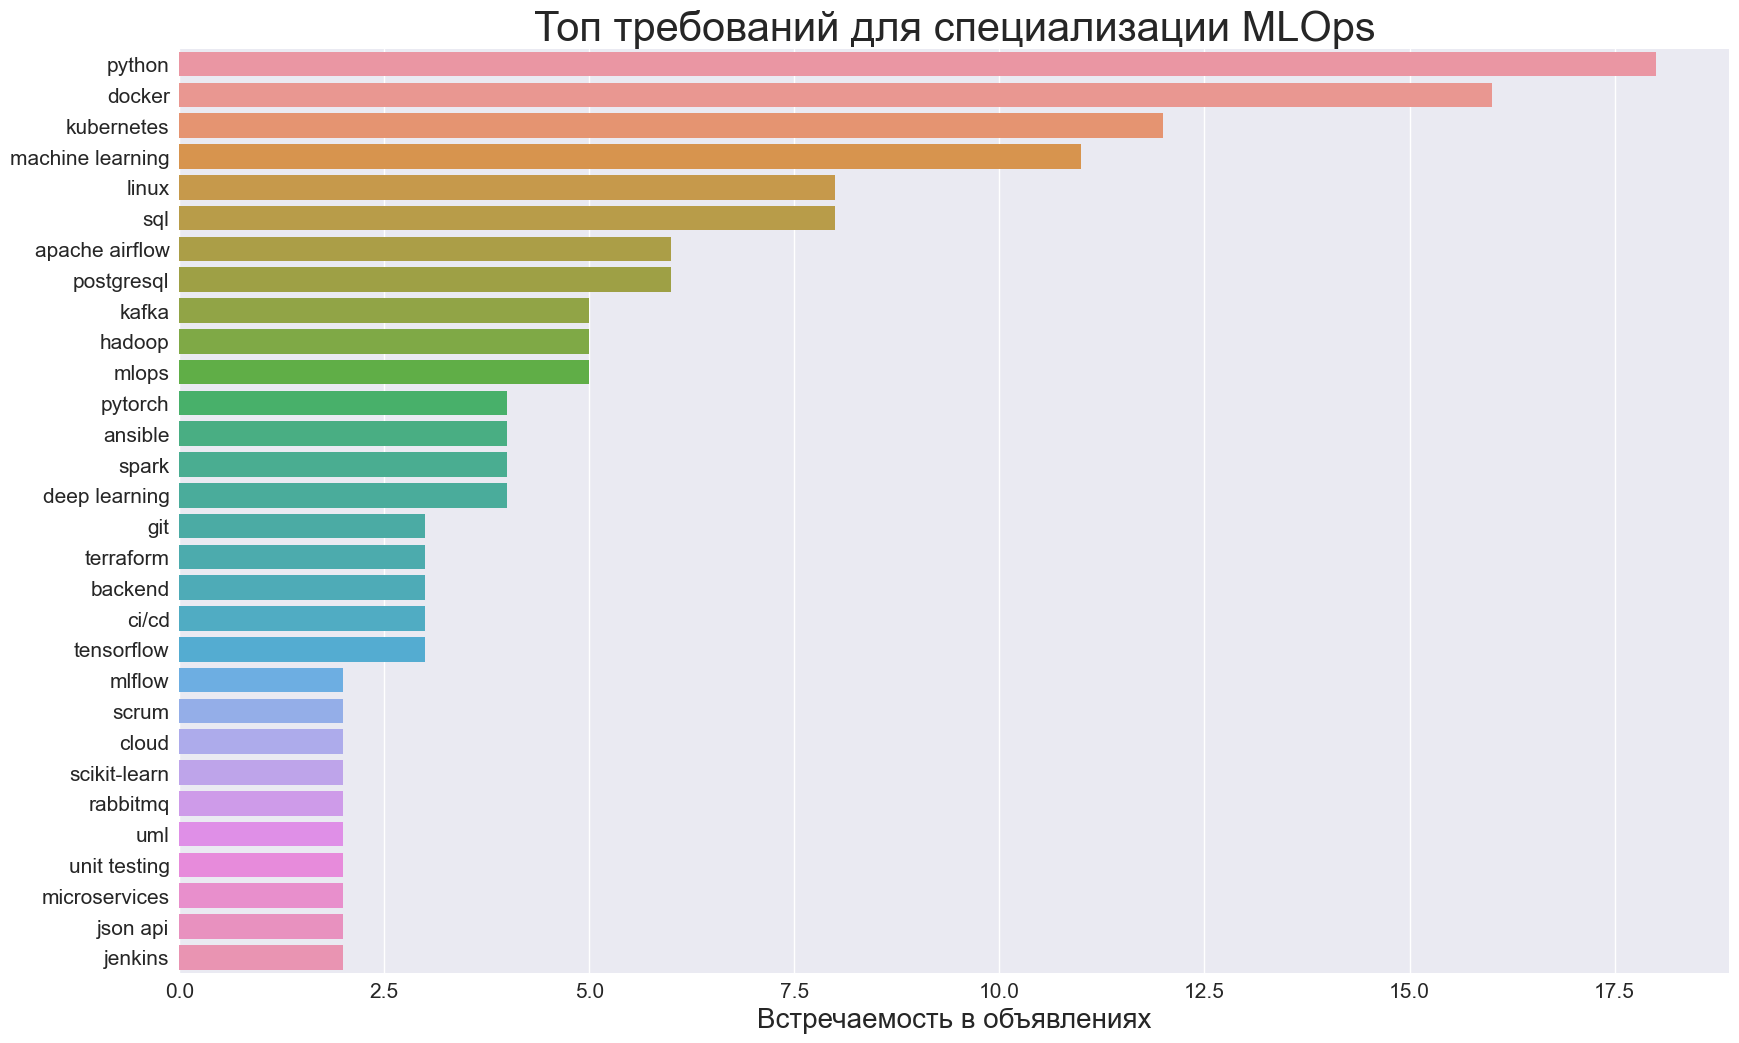

In [29]:
bar_top_skills('MLOps')

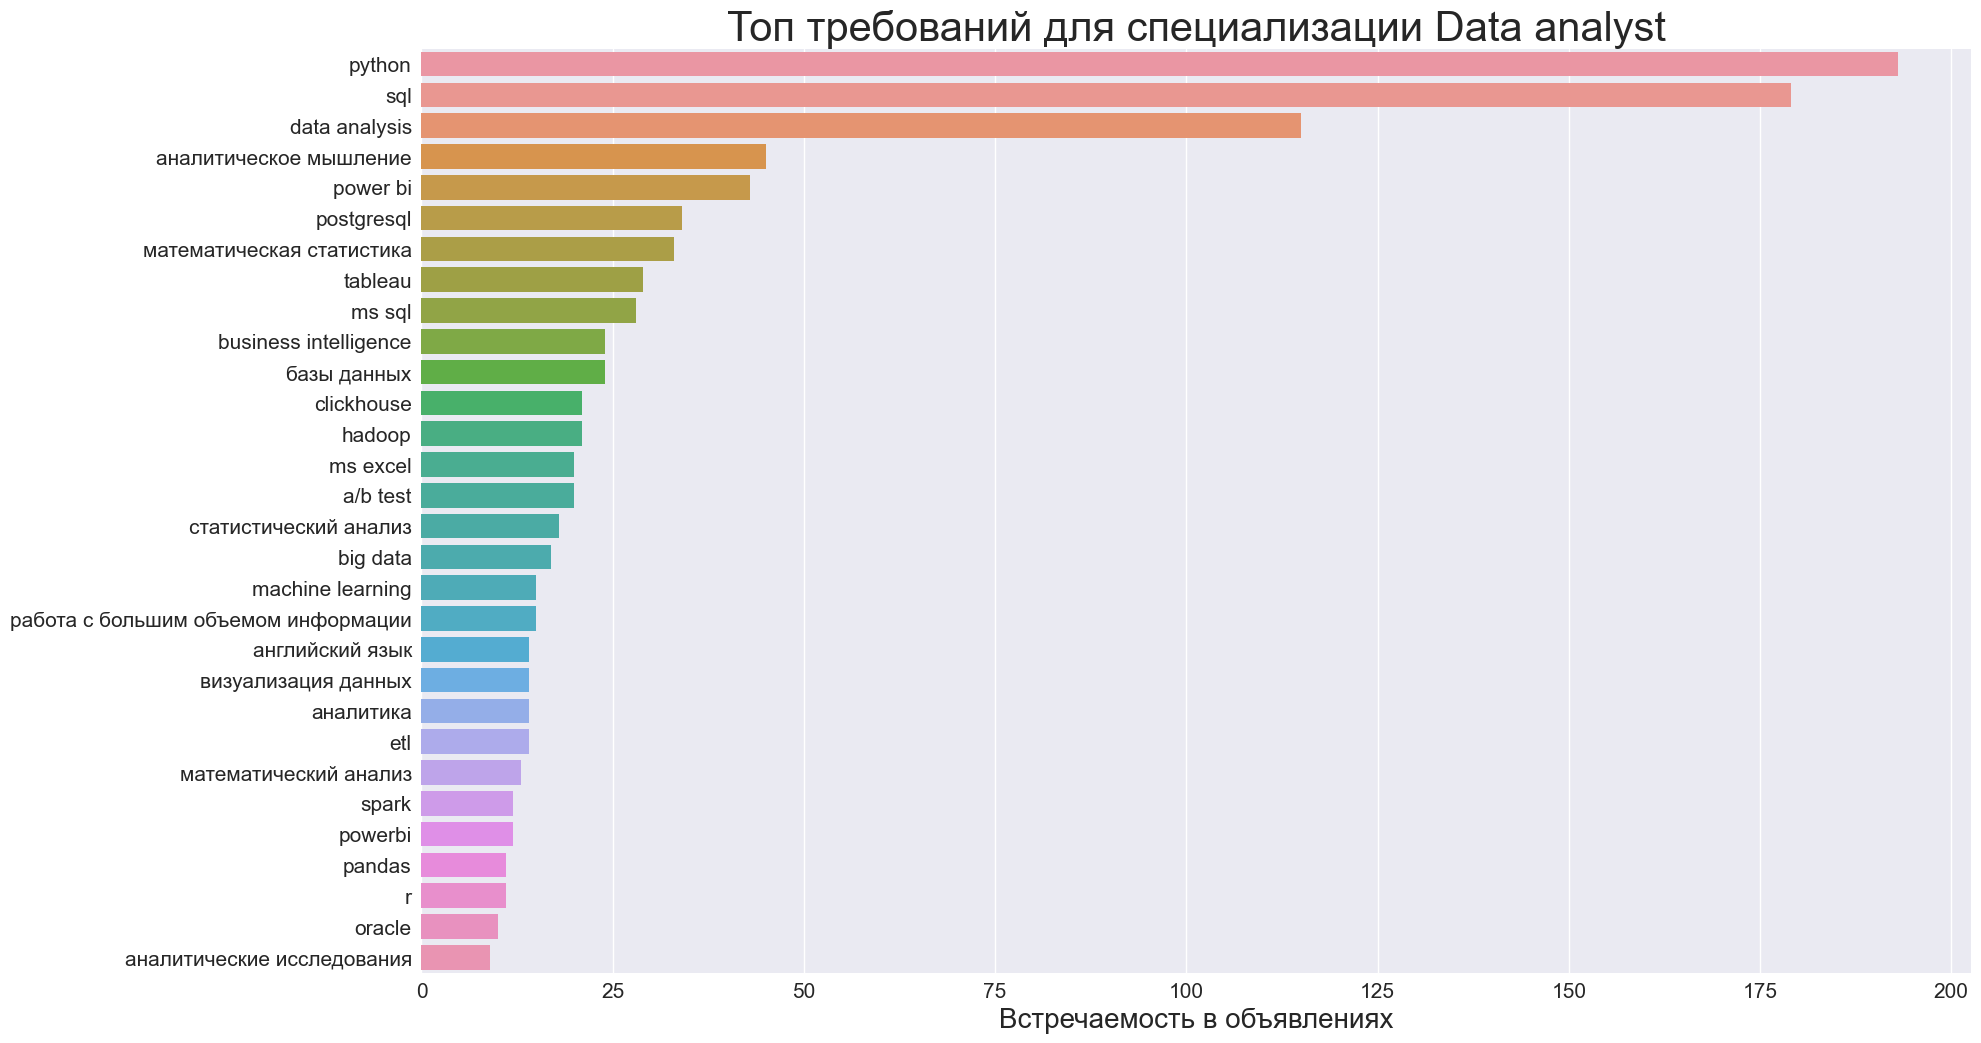

In [30]:
bar_top_skills('Data analyst')